# Image Captioning

### PART 1: Mock Captions

In this example, we demonstrate the workflow of image captioning: taking an input image and producing a textual description.  

> **Note:** This is a **mock implementation** and the captions are generated using simple randomized templates and **do not reflect actual visual understanding** of the images.

#### How it works:
1. A small image is loaded (e.g., `caption_example.jpg`) and displayed.
2. A random template-based caption is generated and printed.
3. This demonstrates the input-output interface of an image captioning model only.

---

### PART 2: Image Captioning with BLIP

To run a real BLIP-based captioning model (e.g., `Salesforce/blip-image-captioning-base`), the following is typically needed:

1. **PyTorch ≥ 2.4**: BLIP is implemented in PyTorch, and newer Hugging Face transformers require a recent PyTorch version.
2. **Transformers ≥ 5.x** and **huggingface_hub ≥ 1.x**: to access the BLIP model and processor.
3. **GPU (optional but recommended)**: for faster inference on images.
4. **Preprocessing**: images need to be resized, normalized, and converted to tensors according to the model’s expected input.

Because PyTorch 2.4 is incompatible with our version of TFDS/TF, you'd have to do this in a new Python environment:

```
conda create -n cv2 
conda activate cv2
conda install -c conda-forge jupyterlab numpy transformers matplotlib pillow ipykernel pytorch 
python -m ipykernel install --user --name cv2 --display-name "Python (cv2)"
```
Next, open Jupyter Lab from scratch and run the PART 2 cell.



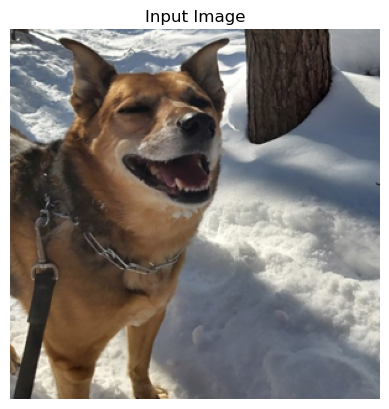

Generated Caption:
A cat is standing at home.


In [2]:
# PART 1: Mock Captions

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random

# Load image
local_image_path = "dog.jpg"

try:
    image = Image.open(local_image_path).resize((299, 299))
except FileNotFoundError:
    print(f"Image '{local_image_path}' not found. Please add a small image in the folder.")
    image = Image.new("RGB", (299, 299), color=(200, 200, 200))  # placeholder

# Convert to array for plotting
image_np = np.array(image) / 255.0

# Display image
plt.imshow(image_np)
plt.axis("off")
plt.title("Input Image")
plt.show()

# Mock caption generator
def generate_mock_caption(image_path):
    """
    Returns a plausible caption string based on image content.
    Since we are not using a real model, we pick from predefined templates.
    """
    objects = ["dog", "cat", "child", "man", "woman", "car", "bicycle", "bird", "tree", "flower"]
    actions = ["sitting", "running", "playing", "looking", "standing", "flying", "walking", "jumping"]
    settings = ["in a park", "on a street", "in the garden", "near a lake", "under a tree", "at home"]

    obj = random.choice(objects)
    act = random.choice(actions)
    loc = random.choice(settings)

    caption = f"A {obj} is {act} {loc}."
    return caption

# Generate and display caption
caption = generate_mock_caption(local_image_path)
print("Generated Caption:")
print(caption)


C:\Users\Jason Eckert\.conda\envs\cv2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


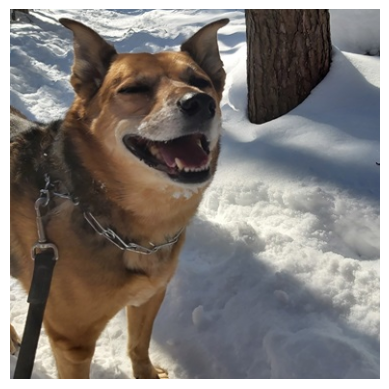

C:\Users\Jason Eckert\.conda\envs\cv2\Lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Jason Eckert\.cache\huggingface\hub\models--Salesforce--blip-image-captioning-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Loading weights: 100%|██████| 473/473 [00:00<00:00, 622.71it/s, Materializing param=vi

Generated Caption: a dog standing in the snow with its mouth open


In [1]:
# PART 2: Image Captioning with BLIP 

from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch
import matplotlib.pyplot as plt

# Load Local Image
# Make sure 'dog.jpg' is in the same folder as the notebook
image_path = "dog.jpg"
image = Image.open(image_path).convert("RGB")
image = image.resize((384, 384))  # optional resize

# Display the image
plt.imshow(image)
plt.axis("off")
plt.show()

# Load Pre-trained BLIP Model & Processor
# Requires: transformers >= 5.x, huggingface_hub >= 1.x, PyTorch >= 2.4
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Preprocess Image and Generate Caption
inputs = processor(images=image, return_tensors="pt")

# Generate caption (torch.device("cuda") if GPU available)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
inputs = {k: v.to(device) for k, v in inputs.items()}

out = model.generate(**inputs, max_new_tokens=50)
caption = processor.decode(out[0], skip_special_tokens=True)

# Display Caption
print("Generated Caption:", caption)
